# EDA

Importi koji su korišćeni za EDU.

In [2]:
import pandas as pd
from ast import literal_eval
from collections import Counter
import itertools
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

Funkcija `parse_season_ratings()` služi za parsiranje stringova koji sadrže podatke o sezonskim ocenama parfema. Koristi regularne izraze da iz stringa izdvoji parove (sezona, procenat), na primer: "_Summer: 85.0% Winter: 10.0%_". Svaki pronađeni par se dodaje u rečnik `season_data`, gde je ključ naziv sezone (npr. "_Summer_"), a vrednost procenat (npr. _85.0%_). Na kraju funkcija vraća rečnik sa sezonskim ocenama u numeričkom formatu, što olakšava dalju analizu i filtriranje podataka u _DataFrame_-u.

In [3]:
def parse_season_ratings(rating_str):
    # Koristimo regularne izraze kako bismo izdvojili sezonske podatke
    season_data = {}
    pattern = r'([A-Za-z]+):\s*([0-9.]+)%'
    matches = re.findall(pattern, rating_str)
    for season, percentage in matches:
        season_data[season] = float(percentage)
    return season_data

# Učitavanje podataka
# Pretpostavljamo da je dataset sačuvan u CSV formatu
file_path = "../datasets/mainDataset.csv"
data = pd.read_csv(file_path, delimiter='|')

# Pretvaranje stringova u liste i rečnike gde je neophodno
data['Accords'] = data['Accords'].apply(literal_eval)
data['Notes'] = data['Notes'].apply(literal_eval)
data['Rating'] = data['Rating'].apply(literal_eval)
data['Season ratings'] = data['Season ratings'].apply(parse_season_ratings)
data['Day ratings'] = data['Day ratings'].apply(parse_season_ratings)
data['Designers'] = data['Designers'].apply(literal_eval)

## Pitanje 1: Koje su najzastupljenije note u 5 najbolje ocenjenih parfema preporučenih za noć?

Analiziraju se popularni parfemi koji su preporučeni za noć. Parfem se smatra popularnim, relevantim medju ljudima i realno ocenjim ukoliko ima najmanje 5000 recenzija. Cilj je identifikovati koje note se najčešće pojavljuju u ovim parfemima i prikazati top 5 parfema sa njihovim brendom, nazivom, rejtingom i brojem ocena.

### Opis vizualizacije
Prikazuje se _bar chart_ sa 10 najzastupljenijih nota, kao i dva _bar chart_-a za top 5 parfema: jedan za rejting, drugi za broj ocena.

### Zaključak
Najzastupljenije note u najpopularnijim parfemima namenjenim prvenstveno za noć, ukazuju na preferencije korisnika za određene mirisne profile tokom noći. Vizualizacija jasno pokazuje koje note dominiraju, kao i koji parfemi su najcenjeniji, što može pomoći pri izboru parfema za noćnu upotrebu. Rezultate slobodno možemo nazvati i očekivanim, uzimajući u obzir da su parfemi linija _Azzaro_, _Jean Paul Gaultier_ i _Armani_ veoma popularni, gde se mnogi smatraju i ,,klasicima" u svetu parfema.

UPIT 1

Najzastupljenije note u top 5 parfema za noć: [('Woodsy Notes', 4), ('Lavender', 4), ('Vanilla', 4), ('Cardamom', 3), ('Iris', 3), ('Oriental notes', 3), ('Ginger', 1), ('Bourbon Vanilla', 1), ('Pink Pepper', 1), ('Juniper', 1)]

Top 5 parfema sa brendovima i nazivima:
Brend: Azzaro, Naziv: The Most Wanted Parfum, Rejting: 4.61, Broj ocena: 5061
Brend: Jean Paul Gaultier, Naziv: Le Male Edt, Rejting: 4.6, Broj ocena: 15513
Brend: Jean Paul Gaultier, Naziv: Le Male Le Parfum Edp Intense, Rejting: 4.6, Broj ocena: 15526
Brend: Jean Paul Gaultier, Naziv: Le Male Le Parfum, Rejting: 4.6, Broj ocena: 15740
Brend: Armani, Naziv: Stronger With You Intensely, Rejting: 4.59, Broj ocena: 11865


/tmp/ipykernel_137908/2526907888.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(notes), palette='viridis')


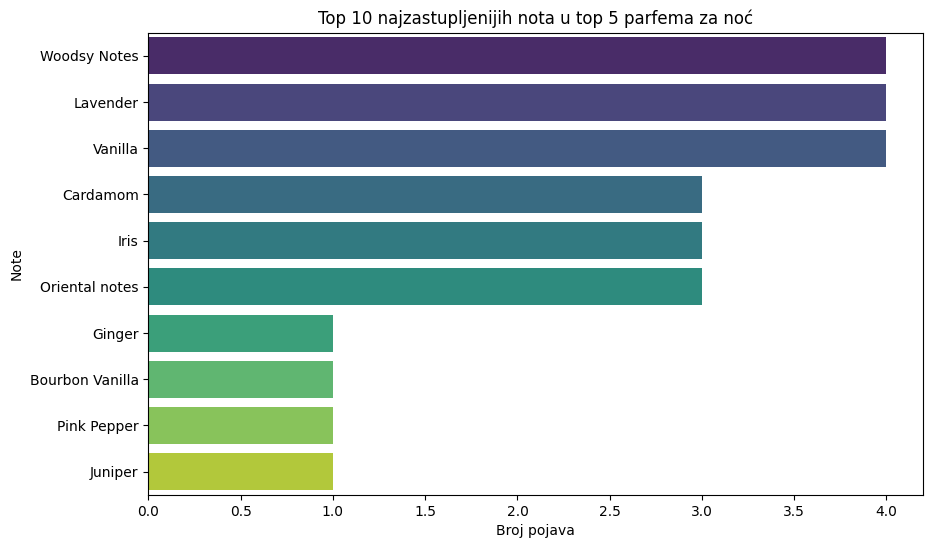

/tmp/ipykernel_137908/2526907888.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perfumes, y=ratings, ax=ax[0], palette='Blues')
/tmp/ipykernel_137908/2526907888.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(perfumes, rotation=45, ha='right')
/tmp/ipykernel_137908/2526907888.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perfumes, y=votes, ax=ax[1], palette='Oranges')
/tmp/ipykernel_137908/2526907888.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(perfume

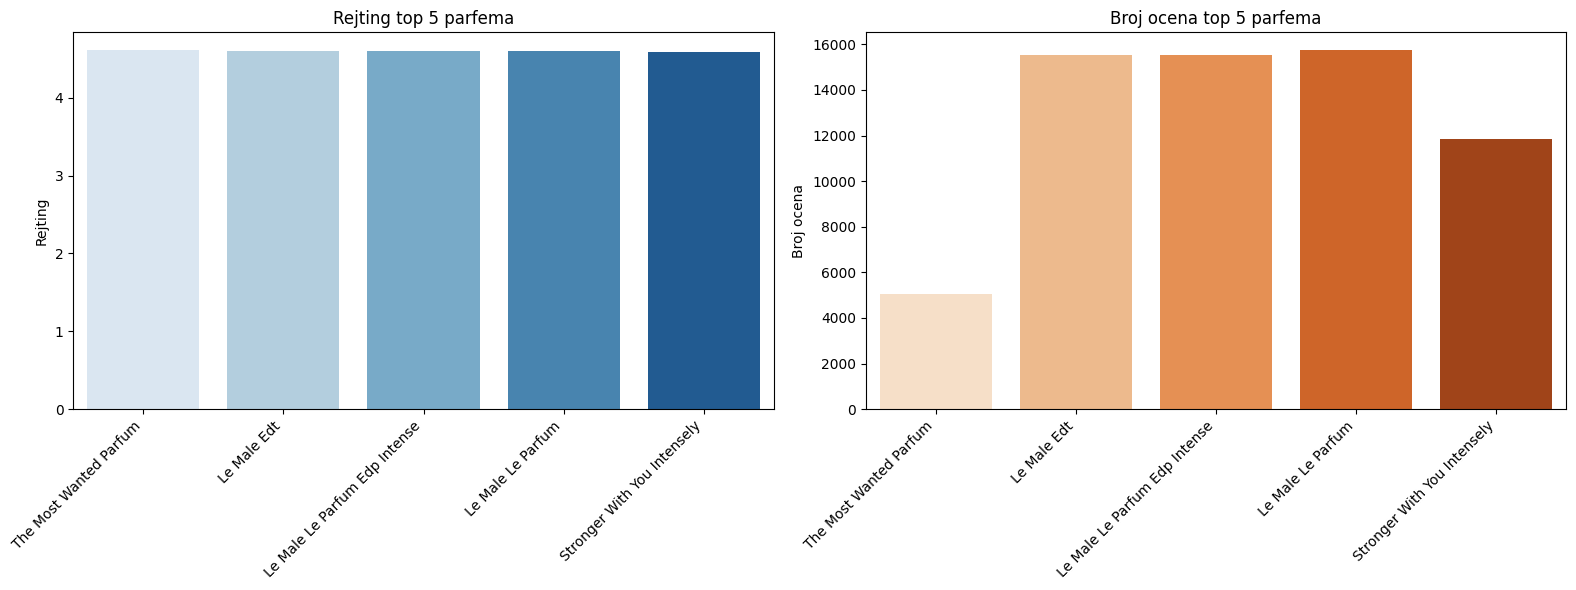

In [6]:
def top_notes_night_perfumes(data):
    # Filtriranje podataka: parfemi sa najmanje 5000 glasova i preporukom za noć iznad 80%, dok je preporuka za dan ispod 50%.
    filtered = data[(data['Day ratings'].apply(lambda x: x['Night'] >= 80 and x['Day'] <= 50)) & 
                    (data['Rating'].apply(lambda x: x['votes'] >= 5000))]
    
    # Sortiranje po oceni
    top_rated = filtered.sort_values(by='Rating', key=lambda x: x.apply(lambda y: y['rating']), ascending=False).head(5)

    notes = []
    perfumes_info = []  # Lista za čuvanje brenda i naziva top 5 parfema
    
    for _, row in top_rated.iterrows():
        # Preuzimanje naziva i brenda
        perfume_name = row['Name']
        brand_name = row['Brand']
        rating = row['Rating']['rating']
        votes = row['Rating']['votes']
        # Dodavanje u listu parfema sa nazivima i brendovima
        perfumes_info.append((perfume_name, brand_name, rating, votes))
        
        # Dodavanje nota
        note_dict = row['Notes']
        notes.extend(note_dict.get('Top Notes', []) + 
                     note_dict.get('Middle Notes', []) + 
                     note_dict.get('Base Notes', []))
    
    # Vraćanje 10 najzastupljenijih nota i informacija o top 5 parfema
    most_common_notes = Counter(notes).most_common(10)
    
    return most_common_notes, perfumes_info

def visualize_top_notes_and_perfumes(most_common_notes, perfumes_info):
    # Vizualizacija najzastupljenijih nota (bar chart)
    notes, counts = zip(*most_common_notes)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(notes), palette='viridis')
    plt.title('Top 10 najzastupljenijih nota u top 5 parfema za noć')
    plt.xlabel('Broj pojava')
    plt.ylabel('Note')
    plt.show()

    # Vizualizacija top 5 parfema sa njihovim rejtingom i brojem ocena (bar chart)
    perfumes, brands, ratings, votes = zip(*perfumes_info)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Bar chart za ocene parfema
    sns.barplot(x=perfumes, y=ratings, ax=ax[0], palette='Blues')
    ax[0].set_title('Rejting top 5 parfema')
    ax[0].set_ylabel('Rejting')
    ax[0].set_xticklabels(perfumes, rotation=45, ha='right')

    # Bar chart za broj ocena
    sns.barplot(x=perfumes, y=votes, ax=ax[1], palette='Oranges')
    ax[1].set_title('Broj ocena top 5 parfema')
    ax[1].set_ylabel('Broj ocena')
    ax[1].set_xticklabels(perfumes, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    
print("UPIT 1")
print("")
most_common_notes, perfumes_info = top_notes_night_perfumes(data)
print("Najzastupljenije note u top 5 parfema za noć:", most_common_notes)
# FIXME: Dodati mozda samo precizniju vizualizaciju za parfeme i njihove ocene
print("\nTop 5 parfema sa brendovima i nazivima:")
for perfume, brand, rating, votes in perfumes_info:
    print(f"Brend: {brand}, Naziv: {perfume}, Rejting: {rating}, Broj ocena: {votes}")
visualize_top_notes_and_perfumes(most_common_notes, perfumes_info)


## Pitanje 2: Koliki procenat parfema preporučenih za leto ima ocenu ispod 4.00, odnosno da većina ljudi nema preterano pozitivno mišljenje o njima (da parfemi nisu _mass appealing_)?
Analiziraju se parfemi preporučeni za leto i računa se procenat onih koji imaju ocenu ispod 4.00.
### Opis vizualizacije
Prikazuje se pie chart koji deli letnje parfeme na one sa ocenom ispod 4.0 i one sa ocenom 4.0 ili više.
### Zaključak
Značajan procenat letnjih parfema ima ocenu ispod 4.0, što može ukazivati na to da su korisnici zahtevniji kada biraju parfeme za letnje mesece, a isto tako da je i tržište slabo po pitanju letnjih parfema, gde se za većinu letnjih parfema može reći da nisu _mass appealing_.

UPIT 2

Procenat letnjih parfema ispod ocene 4.0: 66.83417085427136


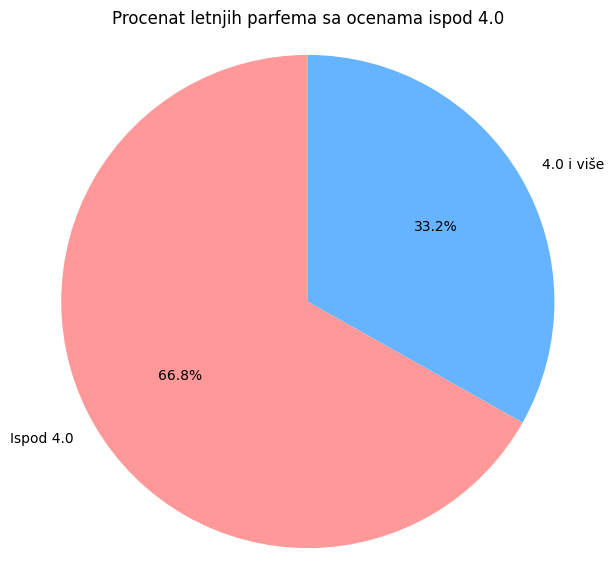

In [7]:
def summer_perfumes_below_rating(data):
    summer_perfumes = data[data['Season ratings'].apply(lambda x: x['Summer'] > 80 and  x['Winter'] <= 50)]
    below_rating = summer_perfumes[summer_perfumes['Rating'].apply(lambda x: x['rating'] < 4.0)]
    return len(below_rating) / len(summer_perfumes) * 100

def visualize_summer_perfumes_below_rating(data):
    # Pozivanje funkcije koja vraća procenat parfema sa ocenama ispod 4.0
    below_rating_percentage = summer_perfumes_below_rating(data)
    above_rating_percentage = 100 - below_rating_percentage
    
    # Prikazivanje pie chart-a
    labels = ['Ispod 4.0', '4.0 i više']
    sizes = [below_rating_percentage, above_rating_percentage]
    colors = ['#ff9999','#66b3ff']  # Prilagođene boje za pie chart
    
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title("Procenat letnjih parfema sa ocenama ispod 4.0")
    plt.axis('equal')  # Pie chart u obliku kruga
    plt.show()

print("UPIT 2")
print("")
print("Procenat letnjih parfema ispod ocene 4.0:", summer_perfumes_below_rating(data))
visualize_summer_perfumes_below_rating(data)

## Pitanje 3: Koji su najčešći akordi i note u parfemima preporučenim za zimu?
Analiziraju se parfemi preporučeni za zimu kako bi se identifikovali najčešći akordi i note.
### Opis vizualizacije
Kombinovani horizontalni bar chart prikazuje 10 najčešćih akorda i 10 najčešćih nota u zimskim parfemima, sa različitim bojama za akorde i note.
### Zaključak
Zimski parfemi najčešće sadrže bogate, tople akorde i note, što odgovara potrebama korisnika za intenzivnijim mirisima tokom hladnijih meseci. Vizualizacija jasno razdvaja akorde i note, olakšavajući identifikaciju dominantnih mirisnih karakteristika.

UPIT 3

Najčešći akordi i note u parfemima preporučenim za zimu: ([('woody', 500), ('warm spicy', 453), ('amber', 374), ('sweet', 371), ('powdery', 361), ('vanilla', 341), ('aromatic', 293), ('fresh spicy', 224), ('balsamic', 214), ('citrus', 196)], [('Vanilla', 229), ('Patchouli', 222), ('Sandalwood', 162), ('Bergamot', 156), ('Amber', 150), ('Musk', 132), ('Jasmine', 118), ('Tonka Bean', 115), ('Cedar', 111), ('Rose', 107)])


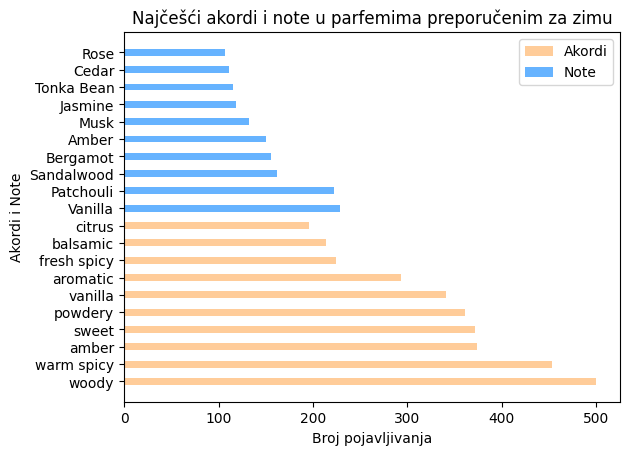

In [9]:
def winter_perfumes_accords_notes(data):
    winter_perfumes = data[data['Season ratings'].apply(lambda x: x['Winter'] > 80)]
    accords = Counter()
    notes = []
    for _, row in winter_perfumes.iterrows():
        accords.update(row['Accords'])
        # Ako su 'Notes' liste, direktno ih proširujemo
        if isinstance(row['Notes'], list):  # Ako je 'Notes' lista
            notes.extend(row['Notes'])
        else:  # Ako je 'Notes' rečnik, onda proširujemo 'Top', 'Middle' i 'Base' note
            note_dict = row['Notes']
            notes.extend(note_dict.get('Top Notes', []))
            notes.extend(note_dict.get('Middle Notes', []))
            notes.extend(note_dict.get('Base Notes', []))
    return accords.most_common(10), Counter(notes).most_common(10)

def visualize_winter_perfumes_accords_notes(data):
    # Pozivanje funkcije koja vraća najčešće akorde i note
    accords, notes = winter_perfumes_accords_notes(data)
    
    # Prvo, preuzimamo podatke o akordima i notama
    accord_labels, accord_counts = zip(*accords)
    note_labels, note_counts = zip(*notes)
    
    # Kombinovani bar chart
    # Kreiramo sve etikete u jednu listu, akorde i note
    all_labels = list(accord_labels) + list(note_labels)
    all_counts = list(accord_counts) + list(note_counts)
    
    # Za grupisani prikaz, treba podešavati širinu barova
    width = 0.4
    x_pos = np.arange(len(all_labels))  # Pozicije za barove
    
    # Stvaramo boje za akorde i note
    accord_colors = ['#FFCC99'] * len(accord_labels)
    note_colors = ['#66B3FF'] * len(note_labels)
    
    # Prvi bar za akorde
    plt.barh(x_pos[:len(accord_labels)], accord_counts, color=accord_colors, height=width, label='Akordi')
    # Drugi bar za note
    plt.barh(x_pos[len(accord_labels):], note_counts, color=note_colors, height=width, label='Note')
    
    # Dodavanje naslova i oznaka
    plt.title("Najčešći akordi i note u parfemima preporučenim za zimu")
    plt.xlabel("Broj pojavljivanja")
    plt.ylabel("Akordi i Note")
    plt.yticks(x_pos, all_labels)  # Prikazujemo sve etikete (akorde i note)
    
    # Dodavanje legende
    plt.legend()
    
    # Prikazivanje grafikona
    plt.show()

print("UPIT 3")
print("")
print("Najčešći akordi i note u parfemima preporučenim za zimu:", winter_perfumes_accords_notes(data))
visualize_winter_perfumes_accords_notes(data)

## Pitanje 4: Koliki je procenat parfemskih kuća koje su učestvovale u kreiranju 20 najbolje ocenjenih popularnih parfema?
Analizira se top 20 popularnih parfema sa najvišim ocenama. U obzir su uzeti parfemi sa više od 10.000 recenzija, kako bi se utvrdilo učešće različitih parfemskih kuća (brendova).

### Opis vizualizacije
_Pie chart_ prikazuje procenat učešća svake parfemske kuće u 20 najbolje ocenjenih parfema.

### Zaključak
Nekoliko parfemskih kuća dominira među najcenjenijim parfemima, dok su ostale manje zastupljene. Ovo može ukazivati na reputaciju i kvalitet određenih brendova u industriji.

UPIT 4

Procenat parfemskih kuća za top 20 parfema: {'house_percentages': {'Jean Paul Gaultier': 25.0, 'Armani': 5.0, 'Viktor&Rolf': 5.0, 'Dolce&Gabbana': 5.0, 'Parfums de Marly': 5.0, 'Yves Saint Laurent': 15.0, 'Prada': 5.0, 'CHANEL': 10.0, 'Kilian': 5.0, 'Tom Ford': 10.0, 'DIOR': 5.0, 'Versace': 5.0}, 'top_perfumes': [{'name': 'Le Male Edt', 'rating': 4.6, 'votes': 15513}, {'name': 'Le Male Le Parfum Edp Intense', 'rating': 4.6, 'votes': 15526}, {'name': 'Le Male Le Parfum', 'rating': 4.6, 'votes': 15740}, {'name': 'Stronger With You Intensely', 'rating': 4.59, 'votes': 11865}, {'name': 'Le Male Elixir', 'rating': 4.55, 'votes': 13208}, {'name': 'Le Male Elixir Parfum', 'rating': 4.55, 'votes': 12953}, {'name': 'Spicebomb Extreme Eau de Parfum', 'rating': 4.52, 'votes': 11916}, {'name': 'The One For Man Edp', 'rating': 4.5, 'votes': 12109}, {'name': 'Layton EdP', 'rating': 4.46, 'votes': 12627}, {'name': 'La Nuit De L’Homme', 'rating': 4.44, 'votes': 20428}, {'name': 'L‘Homme Prada 

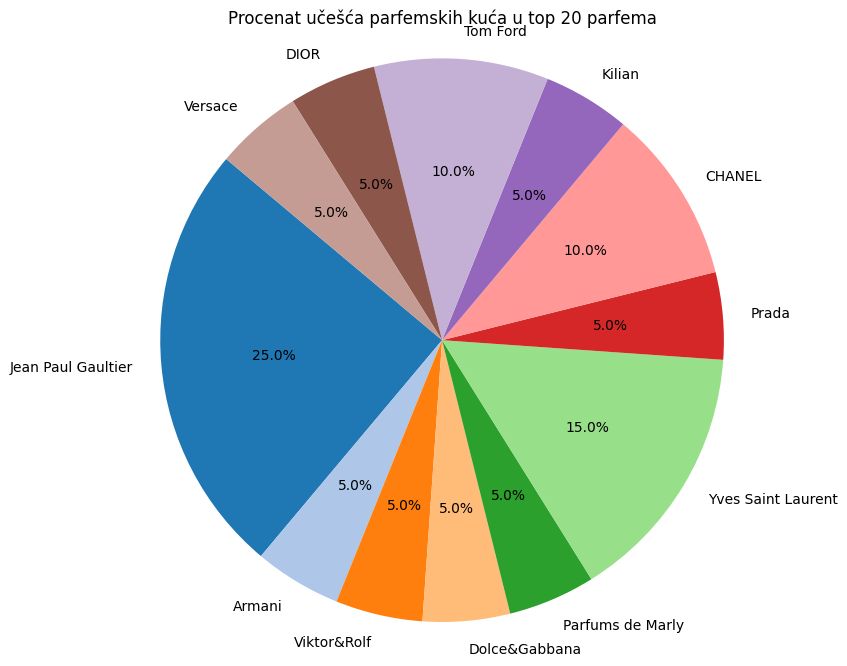

In [10]:
def top_perfume_houses(data):
    # Filtriranje parfema sa više od 10.000 recenzija
    filtered = data[data['Rating'].apply(lambda x: x['votes'] > 10000)]

    # Sortiranje po rejtingu i uzimanje top 20
    top_20 = filtered.sort_values(by='Rating', key=lambda x: x.apply(lambda y: y['rating']), ascending=False).head(20)

    # Uzimanje imena top 20 parfema, vrednosti ocena i broja glasova
    top_perfumes = [
        {
            'name': row['Name'],
            'rating': row['Rating']['rating'],
            'votes': row['Rating']['votes']
        }
        for _, row in top_20.iterrows()
    ]

    # Proveravamo i konvertujemo Designers u liste ako su stringovi
    if isinstance(top_20['Brand'].iloc[0], str):
        top_20['Brand'] = top_20['Brand'].apply(lambda x: x.split(', '))

    # Brojanje učestvovanja brendova u top 20 FIXME
    house_counts = Counter(house for designers in top_20['Brand'] for house in designers)

    # Računanje udela svakog brenda FIXME
    total_top_20 = len(top_20)
    house_percentages = {house: (count / total_top_20) * 100 for house, count in house_counts.items()}


    return {
        'house_percentages': house_percentages,  # Procenat po kućama
        'top_perfumes': top_perfumes  # Imena top 20 parfema
    }

# Pozivanje funkcije
def plot_pie_chart(house_percentages):
    # Podaci za pie chart
    labels = list(house_percentages.keys())
    sizes = list(house_percentages.values())

    # Pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title('Procenat učešća parfemskih kuća u top 20 parfema') # FIXME
    plt.axis('equal')  # Osigurava da je pie chart kružni
    plt.show()

print("UPIT 4")
print("")
results = top_perfume_houses(data)
print("Procenat parfemskih kuća za top 20 parfema:", results) # FIXME
plot_pie_chart(results['house_percentages'])

## Pitanje 5: Koliki je udeo svakog godišnjeg doba za koje je parfem namenjen među popularnim i visoko ocenjenim parfemima?
Analiziraju se parfemi sa visokom ocenom i velikim brojem recenzija, kako bi se utvrdila najčešće preporučena sezona za njihovu upotrebu. Za parfem se smatra da ima visoku ocenu, ukoliko ima prosečnu ocenu iznad 4.30, a smatra se popularnim ukoliko ima najmanje 5000 recenzija.

### Opis vizualizacije
_Pie chart_ prikazuje udeo svake sezone među parfemima sa ocenom 4.3+ i najmanje 5000 recenzija.

### Zaključak
Određena sezona (npr. proleće ili zima) se ističe kao najčešće preporučena za najcenjenije parfeme, što može pomoći korisnicima pri izboru parfema prema sezoni.

UPIT 5

Najčešće preporučena sezona za parfeme sa ocenom 4.3+, koji imaju najmanje 5000 recenzija: {'season_counts': [('Winter', 21), ('Fall', 8), ('Spring', 8), ('Summer', 1)], 'season_perfumes': {'Winter': [{'name': 'Noir Extreme For Men Edp', 'rating': 4.43, 'votes': 9825}, {'name': 'E.stronger With You Absolu He Edp', 'rating': 4.53, 'votes': 5175}, {'name': 'Le Male Edt', 'rating': 4.6, 'votes': 15513}, {'name': 'Gentleman Reserve Prive Man Edp', 'rating': 4.45, 'votes': 6129}, {'name': 'Le Male Elixir Parfum', 'rating': 4.55, 'votes': 12953}, {'name': 'Ombre Leather For Men Edp', 'rating': 4.34, 'votes': 12397}, {'name': 'Man In Black Edp', 'rating': 4.33, 'votes': 8590}, {'name': 'Le Male Le Parfum Edp Intense', 'rating': 4.6, 'votes': 15526}, {'name': 'Grand Soir Eau de Parfum', 'rating': 4.32, 'votes': 9497}, {'name': 'Herod EdP', 'rating': 4.45, 'votes': 8683}, {'name': 'Side Effect EdP', 'rating': 4.35, 'votes': 6112}, {'name': 'Stronger With You Intensely', 'rating': 4.59, 

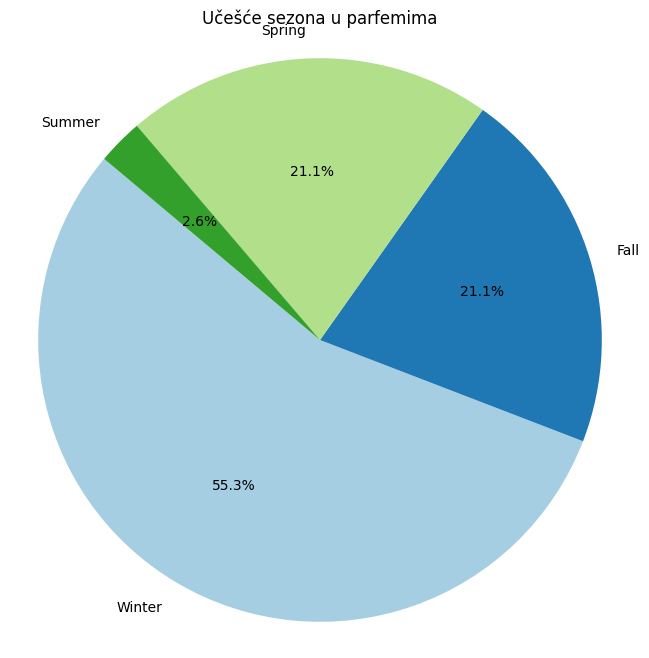

In [11]:
def most_recommended_season(data):
    filtered = data[(data['Rating'].apply(lambda x: x['rating'] >= 4.3)) & 
                    (data['Rating'].apply(lambda x: x['votes'] >= 5000))]
    
    season_counter = Counter()
    season_perfumes = {"Winter": [], "Spring": [], "Summer": [], "Fall": []}
    
    for _, row in filtered.iterrows():
        # Pronađi sezonu sa najvećim procentom
        season_ratings = row['Season ratings']  # Već je parsiran u dict
        max_season = max(season_ratings, key=season_ratings.get)  # Sezona sa najvećim procentom
        season_counter[max_season] += 1  # Inkrementiraj brojač za tu sezonu
        
        # Dodaj informacije o parfemu za tu sezonu
        season_perfumes[max_season].append({
            'name': row['Name'],
            'rating': row['Rating']['rating'],
            'votes': row['Rating']['votes']
        })
    
    return {
        'season_counts': season_counter.most_common(4),  # Broj parfema po sezoni
        'season_perfumes': season_perfumes  # Detalji o parfemima po sezoni
    }

def plot_season_pie_chart(season_counts):
    # Ekstrakcija sezona i njihovih brojeva
    labels = [item[0] for item in season_counts]
    sizes = [item[1] for item in season_counts]

    # Pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Učešće sezona u parfemima')
    plt.axis('equal')  # Osigurava kružni oblik pie chart-a
    plt.show()

print("UPIT 5")
print("")
results = most_recommended_season(data)
print("Najčešće preporučena sezona za parfeme sa ocenom 4.3+, koji imaju najmanje 5000 recenzija:", results)
plot_season_pie_chart(results['season_counts'])

## Pitanje 6: Ko su pet najboljih parfimera na osnovu ocena njihovih parfema?
Računa se ponderisana prosečna ocena za svakog parfimera na osnovu ocena i broja glasova za njihove parfeme, i prikazuje top 5 parfimera.
### Opis vizualizacije
Horizontalni bar chart prikazuje top 5 parfimera sa njihovom ponderisanom ocenom i brojem glasova.
### Zaključak
Rezultati pokazuju istaknute parfimere sa visokom ocenom i velikim brojem glasova što ukazuje na njihovu popularnost i kvalitet rada. Rezultate slobodno možemo nazvati i očekivanim, uzimajući u obzir da su istaknuti parfimeri jedni od najpoznatijih u svetu parfema.

UPIT 6

Top 5 parfimera po ponderisanoj oceni i ukupnom broju glasova:
Quentin Bisch: Ponderisana ocena = 4.22, Ukupno glasova = 189061
Jacques Polge: Ponderisana ocena = 4.16, Ukupno glasova = 118090
Dominique Ropion: Ponderisana ocena = 4.07, Ukupno glasova = 106626
Aurélien Guichard: Ponderisana ocena = 4.06, Ukupno glasova = 128996
Nathalie Lorson: Ponderisana ocena = 4.05, Ukupno glasova = 98576


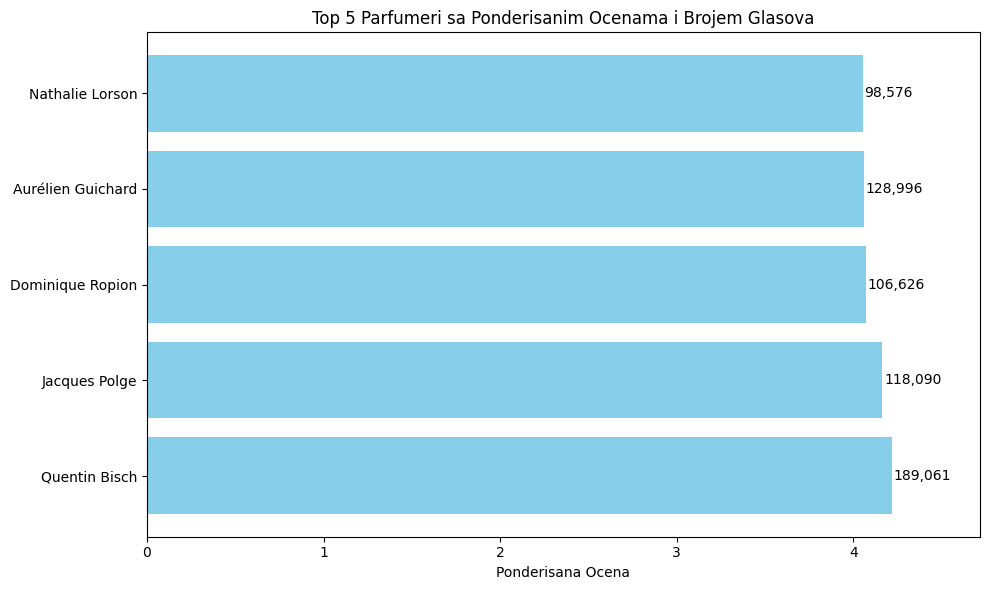

In [12]:
def top_perfumers(data, min_votes=50000):
    perfumer_scores = Counter()
    perfumer_counts = Counter()
    perfumer_votes = Counter()

    # Prikupljanje podataka o ocenama i glasovima
    for _, row in data.iterrows():
        for perfumer in row['Designers']:
            rating = row['Rating']['rating']
            votes = row['Rating']['votes']  # Pretpostavljamo da postoji broj glasova
            perfumer_scores[perfumer] += rating * votes
            perfumer_counts[perfumer] += 1
            perfumer_votes[perfumer] += votes
    
    # Računanje ponderisanih prosek ocena za svakog parfumer
    avg_scores = {}
    for perfumer in perfumer_scores:
        total_votes = perfumer_votes[perfumer]
        
        # Samo parfimeri sa dovoljnim brojem glasova
        if total_votes >= min_votes:
            avg_scores[perfumer] = perfumer_scores[perfumer] / total_votes
        else:
            # Ako parfimer ima manje glasova od min_votes, ne uzimamo ga u obzir
            continue
    
    # Sortiranje po ponderisanoj oceni
    sorted_perfumers = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    
    # Ispis rezultata
    print("Top 5 parfimera po ponderisanoj oceni i ukupnom broju glasova:")
    for perfumer, score in sorted_perfumers:
        total_votes = perfumer_votes[perfumer]
        print(f"{perfumer}: Ponderisana ocena = {score:.2f}, Ukupno glasova = {total_votes}")
    
    return sorted_perfumers, perfumer_votes

def visualize_top_perfumers(top_perfumers_data, perfumer_votes):
    # Prikupljanje imena, ponderisanih ocena i broja glasova
    perfumers = [perfumer for perfumer, _ in top_perfumers_data]
    scores = [score for _, score in top_perfumers_data]
    votes = [perfumer_votes[perfumer] for perfumer in perfumers]

    # Kreiranje figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Horizontalni bar chart
    ax.barh(perfumers, scores, color='skyblue')

    # Dodavanje broja glasova kao oznaku
    for i, (vote, score) in enumerate(zip(votes, scores)):
        ax.text(score + 0.01, i, f'{vote:,}', va='center', ha='left', color='black', fontsize=10)

    # Dodavanje naslova i etiketa
    ax.set_xlabel('Ponderisana Ocena')
    ax.set_title('Top 5 Parfumeri sa Ponderisanim Ocenama i Brojem Glasova')
    ax.set_xlim(0, max(scores) + 0.5)  # Povećavamo opseg kako bi broj glasova stao sa strane

    plt.tight_layout()
    plt.show()

print("UPIT 6")
print("")
top_perfumers_data, perfumer_votes = top_perfumers(data, min_votes=90000)  # Dobijamo top 5 parfimera i perfumer_votes
visualize_top_perfumers(top_perfumers_data, perfumer_votes)

## Pitanje 7: Koja kombinacija tri note se najčešće pojavljuje u popularnim parfemima?
Analiziraju se najčešće kombinacije tri bazne note u parfemima sa ocenom 3.5+ i najmanje 5000 recenzija.

### Opis vizualizacije
Bar chart prikazuje top 5 najčešćih kombinacija tri bazne note i njihovu frekvenciju.

### Zaključak
Određene kombinacije nota se često pojavljuju u najpopularnijim parfemima, što može biti korisno za kreiranje novih parfema ili preporuke korisnicima.

UPIT 7

234
Najčešća kombinacija tri note za parfeme sa ocenom 3.5+ i barem 5000 recenzija: [(('Amber', 'Musk', 'Vanilla'), 13), (('Amber', 'Sandalwood', 'Vanilla'), 12), (('Amber', 'Cedar', 'Musk'), 10), (('Amber', 'Musk', 'Sandalwood'), 10), (('Amber', 'Musk', 'Patchouli'), 10)]


/tmp/ipykernel_137908/3468366299.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=triplets_str, y=counts, palette='viridis', width=0.5)  # Smanjujemo širinu stubova


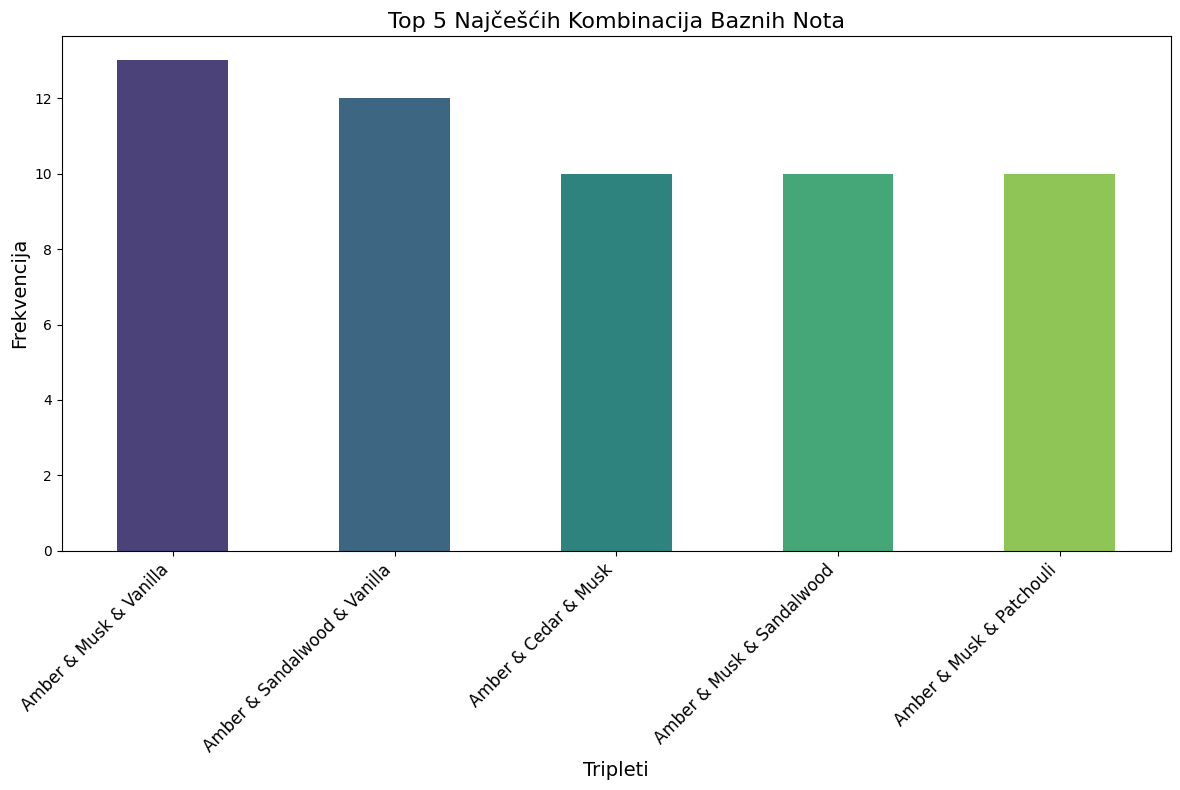

In [13]:
def most_common_note_combinations(data):
    filtered = data[(data['Rating'].apply(lambda x: x['rating'] >= 3.5)) &
                    (data['Rating'].apply(lambda x: x['votes'] >= 5000))]
    """
    Funkcija koja računa najčešće triplete nota u 'Base Notes'
    iz kolone 'Notes' u DataFrame-u.
    """
    triplets = []  # Lista za triplete
    print(len(filtered))
    # Iteracija kroz svaki zapis u koloni ,,Notes"
    for notes in filtered['Notes']:
        base_notes = notes.get('Base Notes', [])  # Uzmi ,,Base Notes" ako postoje
        if len(base_notes) >= 3:  # Samo ako ima najmanje 3 note u ,,Base Notes"
            sorted_base_notes = sorted(base_notes)  # Sortiranje nota po abecedi

            # Generisanje tripleta kombinacijom 3 note
            for triplet in itertools.combinations(sorted_base_notes, 3):
                triplets.append(triplet)

    # Brojanje frekvencije svakog tripleta
    triplet_counts = Counter(triplets)

    # Vraćanje najčešćeg tripleta
    top_triplet = triplet_counts.most_common(5)

    return top_triplet

def plot_most_common_triplets(top_triplet):
    # Preuzimanje tripleta i njihovih frekvencija
    triplets, counts = zip(*top_triplet)

    # Pretvaranje tripleta u string za bolji prikaz
    triplets_str = [' & '.join(triplet) for triplet in triplets]

    # Kreiranje bar grafikona sa vertikalnim stubovima
    plt.figure(figsize=(12, 8))  # Povecavamo dimenzije grafikona za bolji pregled
    sns.barplot(x=triplets_str, y=counts, palette='viridis', width=0.5)  # Smanjujemo širinu stubova

    plt.xlabel('Tripleti', fontsize=14)
    plt.ylabel('Frekvencija', fontsize=14)
    plt.title('Top 5 Najčešćih Kombinacija Baznih Nota', fontsize=16)

    # Rotiramo oznake na x-osi za 45 stepeni i povećavamo razmak između oznaka
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Povećavamo razmak između stubova i automatski prilagođavamo raspored
    plt.tight_layout()
    plt.show()

print("UPIT 7")
print("")
top_triplet = most_common_note_combinations(data)
print("Najčešća kombinacija tri note za parfeme sa ocenom 3.5+ i barem 5000 recenzija:", top_triplet)
plot_most_common_triplets(top_triplet)

## Pitanje 8: Koja kombinacija tri note se najređe pojavljuje u popularnim parfemima?
Analiziraju se najčešće kombinacije tri bazne note u parfemima sa ocenom 3.5+ i najmanje 5000 recenzija.

### Opis vizualizacije
Bar chart prikazuje 5 najređih kombinacija tri bazne note i njihovu frekvenciju.

### Zaključak
Određene kombinacije nota se retko pojavljuju u najpopularnijim parfemima, što može biti ukazatelj na njihove loše preformanse i prosto nedopadljivost kod ljudi.

UPIT 8

234
Najređa kombinacija tri note za parfeme sa ocenom 3.5+ i barem 5000 recenzija: [(('Cashmeran', 'Peru Balsam', 'Vanilla'), 1), (('Oakmoss', 'Opoponax', 'Tobacco Leaf'), 1), (('Guaiac Wood', 'Opoponax', 'Tobacco Leaf'), 1), (('Guaiac Wood', 'Oakmoss', 'Tobacco Leaf'), 1), (('Guaiac Wood', 'Oakmoss', 'Opoponax'), 1)]


C:\Users\edu1\AppData\Local\Temp\ipykernel_9800\2877300190.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=triplets_str, y=counts, palette='viridis', width=0.5)  # Smanjujemo širinu stubova


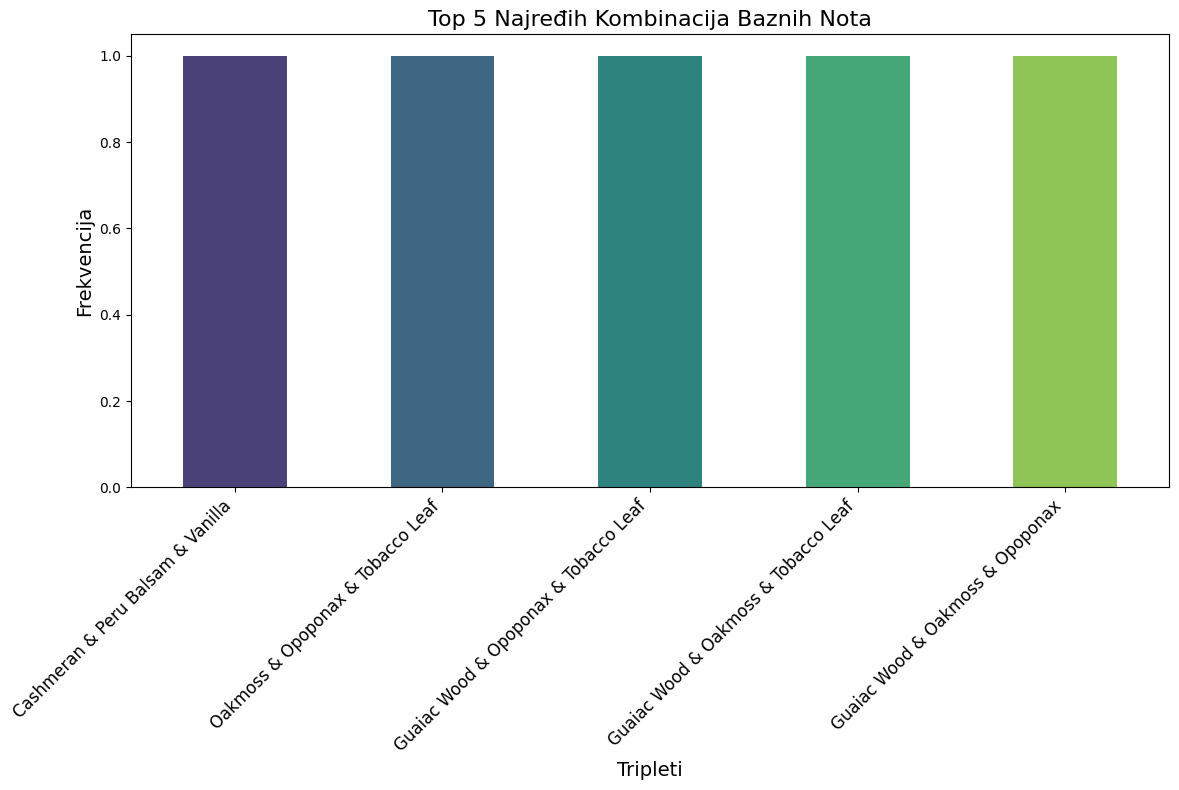

In [6]:
def least_common_note_combinations(data):
    filtered = data[(data['Rating'].apply(lambda x: x['rating'] >= 3.5)) &
                    (data['Rating'].apply(lambda x: x['votes'] >= 5000))]
    """
    Funkcija koja računa najređe triplete nota u 'Base Notes'
    iz kolone 'Notes' u DataFrame-u.
    """
    triplets = []  # Lista za triplete
    print(len(filtered))
    # Iteracija kroz svaki zapis u koloni ,,Notes"
    for notes in filtered['Notes']:
        base_notes = notes.get('Base Notes', [])  # Uzmi ,,Base Notes" ako postoje
        if len(base_notes) >= 3:  # Samo ako ima najmanje 3 note u ,,Base Notes"
            sorted_base_notes = sorted(base_notes)  # Sortiranje nota po abecedi

            # Generisanje tripleta kombinacijom 3 note
            for triplet in itertools.combinations(sorted_base_notes, 3):
                triplets.append(triplet)

    # Brojanje frekvencije svakog tripleta
    triplet_counts = Counter(triplets)

    # Vraćanje najčešćeg tripleta
    bottom_triplet = triplet_counts.most_common()[:-6:-1]

    return bottom_triplet

def plot_least_common_triplets(bottom_triplet):
    # Preuzimanje tripleta i njihovih frekvencija
    triplets, counts = zip(*bottom_triplet)

    # Pretvaranje tripleta u string za bolji prikaz
    triplets_str = [' & '.join(triplet) for triplet in triplets]

    # Kreiranje bar grafikona sa vertikalnim stubovima
    plt.figure(figsize=(12, 8))  # Povecavamo dimenzije grafikona za bolji pregled
    sns.barplot(x=triplets_str, y=counts, palette='viridis', width=0.5)  # Smanjujemo širinu stubova

    plt.xlabel('Tripleti', fontsize=14)
    plt.ylabel('Frekvencija', fontsize=14)
    plt.title('Top 5 Najređih Kombinacija Baznih Nota', fontsize=16)

    # Rotiramo oznake na x-osi za 45 stepeni i povećavamo razmak između oznaka
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Povećavamo razmak između stubova i automatski prilagođavamo raspored
    plt.tight_layout()
    plt.show()

print("UPIT 8")
print("")
bottom_triplet = least_common_note_combinations(data)
print("Najređa kombinacija tri note za parfeme sa ocenom 3.5+ i barem 5000 recenzija:", bottom_triplet)
plot_least_common_triplets(bottom_triplet)